# THE SPARK FOUNDATION - GRIP -APRIL 2023


## Task -1 - Prediction using supervised ML

### Author - prathyusha
### Dataset used  student scores

## Problem statement

### Predict the percentage of a student based on the number of study hours

### what will be predicted  score if a student studies for 9.25 hrs/day?


## Read the data file in CSV dataset in pandas


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
path = "C:\\Users\\PRATHYUSHA\\Downloads\\student scores.csv"

In [78]:
data = pd.read_csv(path)
data.head(10)

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [79]:
data.shape

(25, 2)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [81]:
data.describe()

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## visualize the data

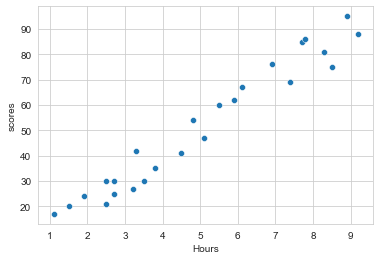

In [82]:
sns.scatterplot(x=data["Hours"], y=data["scores"]);       # plot of the data

<AxesSubplot:xlabel='Hours', ylabel='scores'>

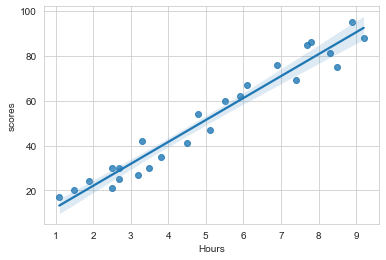

In [83]:
sns.regplot(x=data['Hours'], y=data['scores'])

In [84]:
data.corr(method='pearson')

,Hours,scores
Hours,1.000000,0.976191
scores,0.976191,1.000000


In [85]:
hours=data['Hours']
Score=data['scores']

C:\Users\PRATHYUSHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

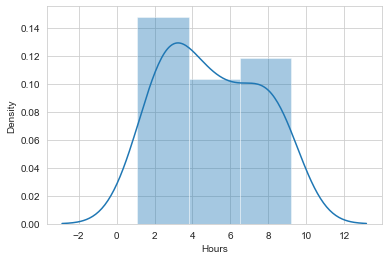

In [88]:
sns.distplot(hours)

C:\Users\PRATHYUSHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scores', ylabel='Density'>

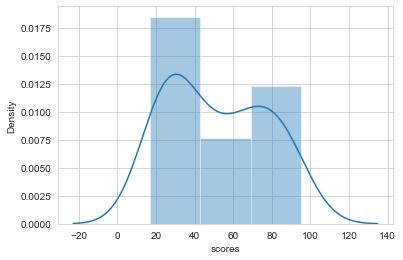

In [89]:
sns.distplot(Score)

## Separate features and target

In [60]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

# Train-Test split

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state =50)

## Model Building

In [93]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [94]:
reg.fit(X_train, Y_train)

LinearRegression()

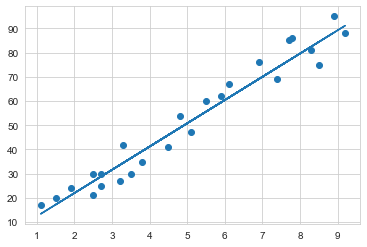

In [96]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,Y)
plt.plot(X, line);
plt.show()

## Prediction

In [97]:
y_pred=reg.predict(X_test)

In [99]:
actual_predicted=pd.DataFrame({'Target':Y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\PRATHYUSHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


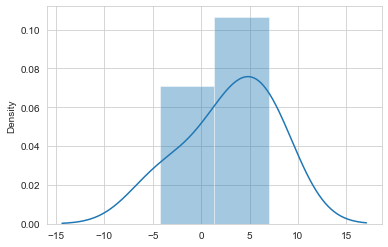

In [101]:
sns.set_style('whitegrid')
sns.distplot(np.array(Y_test-y_pred))
plt.show()

## what would be the predicted score if a student studies for 9.25hrs/day

In [103]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


# Model evalution

In [105]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred))
print('R2 Score:',r2_score(Y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
